# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Ahmad Fuad Fauzi
- **Email:** ahmadfuadfauzi13@gmail.com
- **ID Dicoding:** ahmadfuadfauzi

## Menentukan Pertanyaan Bisnis

- Kota mana yang secara konsisten memiliki kualitas udara terburuk/terbaik berdasarkan rata-rata PM2.5

- Bagaimana tren kualitas udara (fokus pada PM2.5 dan PM10) di setiap kota selama beberapa tahun terakhir? Apakah ada perbaikan atau penurunan yang signifikan?

- Bagaimana pengaruh kondisi cuaca (suhu, tekanan, kelembaban, angin, hujan) terhadap tingkat polusi di setiap kota?

## Import Semua Packages/Library yang Digunakan

In [34]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [35]:
list_path = [
    './data/PRSA_Data_Aotizhongxin_20130301-20170228.csv',
    './data/PRSA_Data_Changping_20130301-20170228.csv',
    './data/PRSA_Data_Dingling_20130301-20170228.csv',
    './data/PRSA_Data_Dongsi_20130301-20170228.csv',
    './data/PRSA_Data_Guanyuan_20130301-20170228.csv',
    './data/PRSA_Data_Gucheng_20130301-20170228.csv',
    './data/PRSA_Data_Huairou_20130301-20170228.csv',
    './data/PRSA_Data_Nongzhanguan_20130301-20170228.csv',
    './data/PRSA_Data_Shunyi_20130301-20170228.csv',
    './data/PRSA_Data_Tiantan_20130301-20170228.csv',
    './data/PRSA_Data_Wanliu_20130301-20170228.csv',
    './data/PRSA_Data_Wanshouxigong_20130301-20170228.csv',
]

list_df = []
for path in list_path:
    try:
        df = pd.read_csv(path)
        list_df.append(df)
        print(f"Berhasil mengimpor: {path.split('/')[-1]}")
    except Exception as e:
        print(f"Gagal mengimpor {path.split('/')[-1]}: {e}")

Berhasil mengimpor: PRSA_Data_Aotizhongxin_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Changping_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Dingling_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Dongsi_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Guanyuan_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Gucheng_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Huairou_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Nongzhanguan_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Shunyi_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Tiantan_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Wanliu_20130301-20170228.csv
Berhasil mengimpor: PRSA_Data_Wanshouxigong_20130301-20170228.csv


In [36]:
if list_df:
    all_df = pd.concat(list_df, ignore_index=True)
    print("\nSemua file berhasil digabungkan menjadi 'all_df'.")
else:
    print("\nTidak ada file CSV yang berhasil diimpor.")


Semua file berhasil digabungkan menjadi 'all_df'.


### Assessing Data

In [37]:
#function for data summary
def assess_data_summary(df):
    print("="*40)
    print("🔍 Ringkasan Umum Data")
    print("="*40)
    print(f"Jumlah baris: {df.shape[0]}")
    print(f"Jumlah kolom: {df.shape[1]}")
    print(f"Jumlah duplikat: {df.duplicated().sum()}")

    print("\n📌 Tipe Data Tiap Kolom:")
    print(df.dtypes)

    print("\n📌 Jumlah Nilai Null per Kolom:")
    nulls = df.isnull().sum()
    print(nulls[nulls > 0] if nulls.sum() > 0 else "Tidak ada nilai null.")

    print("\n📌 Ringkasan Statistik Kolom Numerik:")
    print(df.describe().T[['mean', 'std', 'min', 'max']])

    print("\n📌 Kolom Unik Bernilai Kategori:")
    for col in df.select_dtypes(include='object').columns:
        print(f"{col}: {df[col].nunique()} nilai unik")
        if df[col].nunique() <= 10:
            print(f"  → {df[col].unique()}")

    if 'station' in df.columns:
        print("\n📌 Distribusi Jumlah Data per Kota (Kolom 'station'):")
        print(df['station'].value_counts().head())
        print("...")
        print(df['station'].value_counts().tail())

    print("="*40)
    print("✅ Assessing selesai!\n")

assess_data_summary(all_df)


🔍 Ringkasan Umum Data
Jumlah baris: 420768
Jumlah kolom: 18
Jumlah duplikat: 0

📌 Tipe Data Tiap Kolom:
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

📌 Jumlah Nilai Null per Kolom:
PM2.5     8739
PM10      6449
SO2       9021
NO2      12116
CO       20701
O3       13277
TEMP       398
PRES       393
DEWP       403
RAIN       390
wd        1822
WSPM       318
dtype: int64

📌 Ringkasan Statistik Kolom Numerik:
               mean           std        min      max
No     17532.500000  10122.116943     1.0000  35064.0
year    2014.662560      1.177198  2013.0000   2017.0
month      6.522930      3.448707     1.0000     12.0
day       15.729637      8.800102     1.0000     31.0
hour   

**Insight:**
- Jumlah baris: 420768
- Jumlah kolom: 18
- Jumlah duplikat: 0
- Jumlah Nilai Null per Kolom:
  - PM2.5 = 8739
  - PM10  =    6449
  - SO2  =     9021
  - NO2  =   12116
  - CO   =  20701
  - O3   = 13277
  - TEMP =  398
  - PRES = 393
  - DEWP = 403
  - RAIN = 390
  - wd   = 1822
  - WSPM = 318
- Tiap kota memiliki 35064 baris data

In [38]:
#function for detect outliers
def detect_outliers_iqr(df, cols, verbose=True):
    outlier_summary = {}


    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_count = outliers.shape[0]
        outlier_summary[col] = {
            'jumlah_outlier': outlier_count,
            'persentase_outlier': round(outlier_count / len(df) * 100, 2),
            'batas_bawah': lower,
            'batas_atas': upper
        }
        if verbose:
            print(f"📌 Kolom: {col}")
            print(f"  Jumlah outlier: {outlier_count} ({round(outlier_count / len(df) * 100, 2)}%)")
            print(f"  Batas bawah: {lower:.2f}, Batas atas: {upper:.2f}\n")

    return outlier_summary

detect_outliers_iqr(all_df, all_df.select_dtypes(include='number').columns, verbose=True)

📌 Kolom: No
  Jumlah outlier: 0 (0.0%)
  Batas bawah: -17530.50, Batas atas: 52595.50

📌 Kolom: year
  Jumlah outlier: 0 (0.0%)
  Batas bawah: 2011.00, Batas atas: 2019.00

📌 Kolom: month
  Jumlah outlier: 0 (0.0%)
  Batas bawah: -5.00, Batas atas: 19.00

📌 Kolom: day
  Jumlah outlier: 0 (0.0%)
  Batas bawah: -14.50, Batas atas: 45.50

📌 Kolom: hour
  Jumlah outlier: 0 (0.0%)
  Batas bawah: -11.50, Batas atas: 34.50

📌 Kolom: PM2.5
  Jumlah outlier: 19142 (4.55%)
  Batas bawah: -116.50, Batas atas: 247.50

📌 Kolom: PM10
  Jumlah outlier: 14658 (3.48%)
  Batas bawah: -127.50, Batas atas: 308.50

📌 Kolom: SO2
  Jumlah outlier: 35566 (8.45%)
  Batas bawah: -22.50, Batas atas: 45.50

📌 Kolom: NO2
  Jumlah outlier: 7021 (1.67%)
  Batas bawah: -49.00, Batas atas: 143.00

📌 Kolom: CO
  Jumlah outlier: 28054 (6.67%)
  Batas bawah: -1000.00, Batas atas: 3000.00

📌 Kolom: O3
  Jumlah outlier: 16599 (3.94%)
  Batas bawah: -95.50, Batas atas: 188.50

📌 Kolom: TEMP
  Jumlah outlier: 0 (0.0%)
  Bata

{'No': {'jumlah_outlier': 0,
  'persentase_outlier': 0.0,
  'batas_bawah': np.float64(-17530.5),
  'batas_atas': np.float64(52595.5)},
 'year': {'jumlah_outlier': 0,
  'persentase_outlier': 0.0,
  'batas_bawah': np.float64(2011.0),
  'batas_atas': np.float64(2019.0)},
 'month': {'jumlah_outlier': 0,
  'persentase_outlier': 0.0,
  'batas_bawah': np.float64(-5.0),
  'batas_atas': np.float64(19.0)},
 'day': {'jumlah_outlier': 0,
  'persentase_outlier': 0.0,
  'batas_bawah': np.float64(-14.5),
  'batas_atas': np.float64(45.5)},
 'hour': {'jumlah_outlier': 0,
  'persentase_outlier': 0.0,
  'batas_bawah': np.float64(-11.5),
  'batas_atas': np.float64(34.5)},
 'PM2.5': {'jumlah_outlier': 19142,
  'persentase_outlier': 4.55,
  'batas_bawah': np.float64(-116.5),
  'batas_atas': np.float64(247.5)},
 'PM10': {'jumlah_outlier': 14658,
  'persentase_outlier': 3.48,
  'batas_bawah': np.float64(-127.5),
  'batas_atas': np.float64(308.5)},
 'SO2': {'jumlah_outlier': 35566,
  'persentase_outlier': 8.45

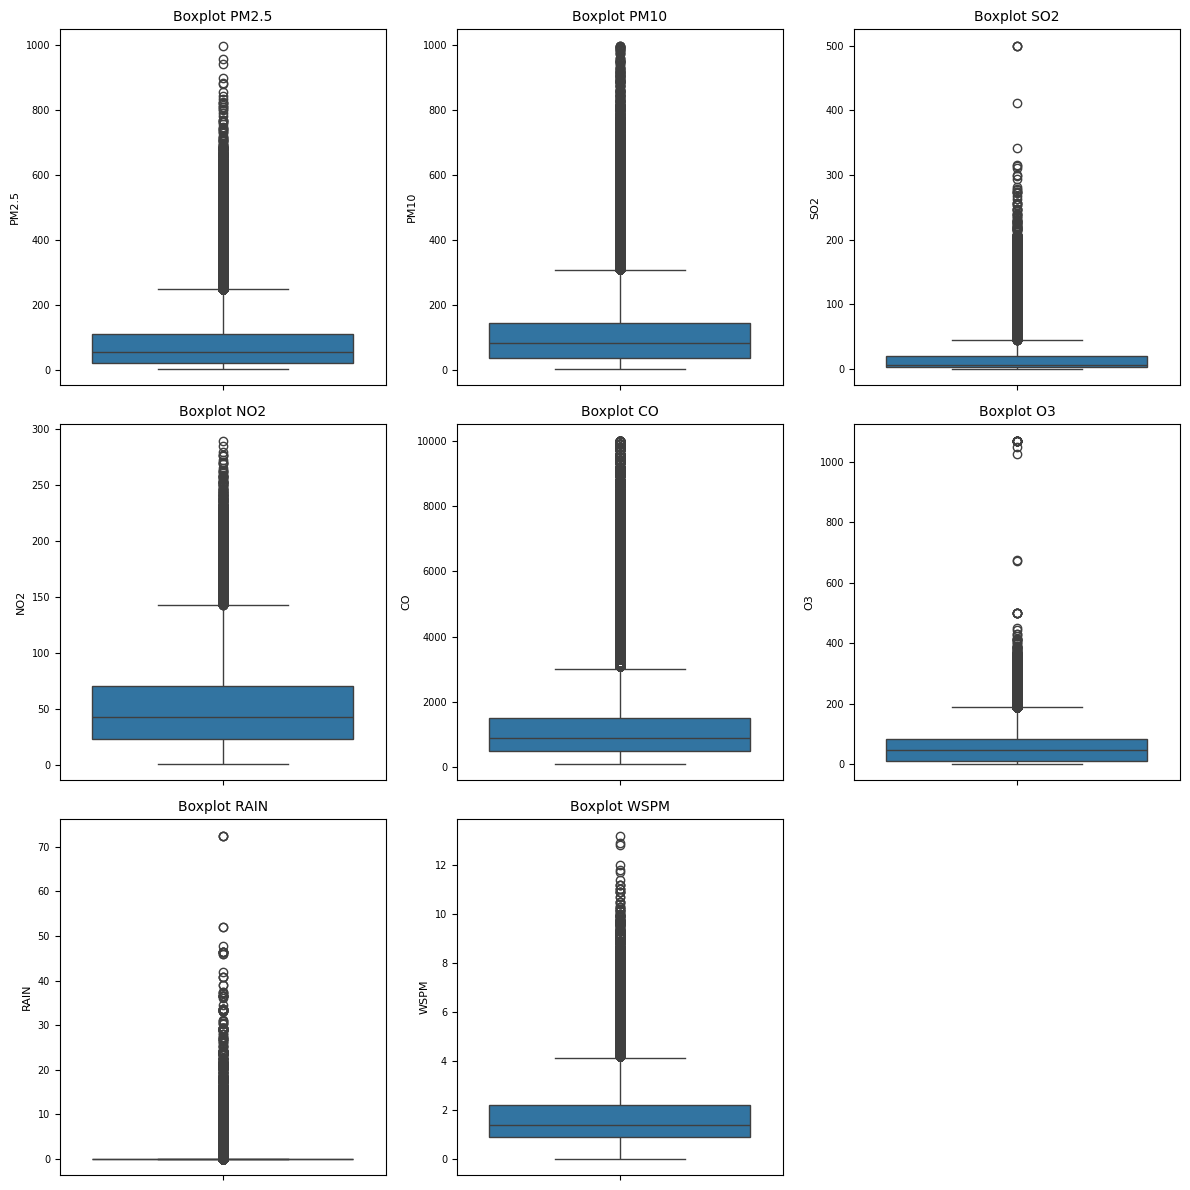

In [39]:
# visualize outliers
cols_with_outliers = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN', 'WSPM']

numerical_df = all_df.select_dtypes(include='number')

cols_to_plot = [col for col in cols_with_outliers if col in numerical_df.columns]

num_cols = len(cols_to_plot)
if num_cols > 0:
    rows = (num_cols + 2) // 3
    fig, axes = plt.subplots(rows, 3, figsize=(12, 4 * rows))

    for i, col in enumerate(cols_to_plot):
        row_index = i // 3
        col_index = i % 3
        sns.boxplot(y=numerical_df[col], ax=axes[row_index, col_index])
        axes[row_index, col_index].set_title(f'Boxplot {col}', fontsize=10)
        axes[row_index, col_index].set_ylabel(col, fontsize=8)
        axes[row_index, col_index].tick_params(axis='y', labelsize=7)

    if num_cols % 3 != 0:
        for j in range(num_cols % 3, 3):
            fig.delaxes(axes[rows - 1, j])

    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada kolom dengan outlier yang ditemukan dalam data numerik.")

In [40]:
#Pivot PM2.5 by station
pivot_pm25 = all_df.pivot_table(index='station', columns='year', values='PM2.5', aggfunc='mean')
pivot_pm25

year,2013,2014,2015,2016,2017
station,,,,,
Aotizhongxin,82.392472,90.796063,82.118422,74.104334,94.762143
Changping,72.644508,79.410815,69.615911,61.655940,80.101284
Dingling,64.754924,74.155592,64.610369,59.827554,68.365316
Dongsi,86.940286,87.469606,87.343090,80.225952,103.497114
Guanyuan,82.129384,88.382632,82.411894,77.136164,93.070433
Gucheng,82.000832,89.250122,83.626937,77.425347,101.404301
Huairou,68.677538,77.300546,70.654622,61.126101,74.265000
Nongzhanguan,84.347570,90.303430,85.965001,76.034515,101.684400
Shunyi,77.198249,84.583744,81.275313,71.769231,95.592434


In [41]:
#pivot pm10
pivot_pm10 = all_df.pivot_table(index='station', columns='year', values='PM10', aggfunc='mean')
pivot_pm10

year,2013,2014,2015,2016,2017
station,,,,,
Aotizhongxin,112.915111,122.056848,112.058187,94.647988,107.329051
Changping,91.252522,106.579774,94.137613,86.331492,94.361368
Dingling,78.658557,90.523049,85.367790,80.444044,78.618337
Dongsi,104.961051,117.000737,111.853397,103.032885,131.809013
Guanyuan,107.756037,115.817294,106.344316,104.685072,117.155459
Gucheng,112.565384,133.769248,116.229187,110.710145,126.627957
Huairou,94.792924,100.188273,89.405579,82.257826,92.021398
Nongzhanguan,103.834902,125.428354,107.432185,96.915929,119.799713
Shunyi,94.626048,110.940605,99.700982,87.474463,107.179872


In [42]:
#pivot rain
pivot_rain = all_df.pivot_table(index='station', columns='year', values='RAIN', aggfunc='max')
pivot_rain

year,2013,2014,2015,2016,2017
station,,,,,
Aotizhongxin,72.5,40.7,36.6,46.4,0.8
Changping,25.3,21.6,52.1,22.7,0.6
Dingling,25.3,21.6,52.1,22.7,0.6
Dongsi,27.3,29.0,36.6,46.4,0.8
Guanyuan,72.5,40.7,36.6,46.4,0.8
Gucheng,36.6,39.0,41.9,30.4,1.3
Huairou,45.9,45.9,30.9,36.1,1.0
Nongzhanguan,27.3,29.0,36.6,46.4,0.8
Shunyi,31.2,37.3,30.9,19.5,1.1


### Cleaning Data

In [43]:
#drop irrelevant column (column 'No')
all_df.drop('No', axis=1, inplace=True)

In [44]:
#fill null with interpolate method
all_df.interpolate(method='linear', inplace=True)
all_df.info()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13396\1749687281.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  all_df.interpolate(method='linear', inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    420768 non-null  float64
 5   PM10     420768 non-null  float64
 6   SO2      420768 non-null  float64
 7   NO2      420768 non-null  float64
 8   CO       420768 non-null  float64
 9   O3       420768 non-null  float64
 10  TEMP     420768 non-null  float64
 11  PRES     420768 non-null  float64
 12  DEWP     420768 non-null  float64
 13  RAIN     420768 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420768 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


**Insight:**
- Menghapus kolom 'No' karena tidak digunakan dalam analisis
- Mengisi nilai kosong dengan metode interpolate

## Exploratory Data Analysis (EDA)

### Explore ...

In [45]:
#average polutans by city
avg_by_city = all_df.groupby('station')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().round(2)
avg_by_city = avg_by_city.sort_values(by='PM2.5', ascending=False)
display(avg_by_city)

,PM2.5,PM10,SO2,NO2,CO,O3
station,,,,,,
Dongsi,86.14,110.35,18.51,53.95,1331.91,57.70
Nongzhanguan,85.08,109.38,18.76,58.10,1327.77,58.43
Wanshouxigong,85.07,112.51,17.36,55.50,1373.62,55.92
Gucheng,84.07,119.26,15.71,55.84,1338.10,58.00
Wanliu,83.47,110.71,18.41,65.67,1328.76,46.91
Guanyuan,82.90,109.37,17.61,58.14,1258.33,54.82
Aotizhongxin,82.54,110.21,17.46,59.07,1264.69,55.33
Tiantan,82.03,106.54,14.51,53.26,1305.33,56.15
Shunyi,79.44,99.27,13.45,44.09,1197.90,54.22


In [46]:
#average PM2.5 by city
avg_pm25_by_city = all_df.groupby('station')['PM2.5'].mean().round(2)
avg_pm25_by_city = avg_pm25_by_city.sort_values(ascending=False)
display(avg_pm25_by_city)

station
Dongsi           86.14
Nongzhanguan     85.08
Wanshouxigong    85.07
Gucheng          84.07
Wanliu           83.47
Guanyuan         82.90
Aotizhongxin     82.54
Tiantan          82.03
Shunyi           79.44
Changping        70.99
Huairou          69.50
Dingling         66.85
Name: PM2.5, dtype: float64

In [47]:
#Average polutan by city by year
avg_city_year = all_df.groupby(['station', 'year'])[['PM2.5', 'PM10', 'SO2', 'NO2']].mean().round(2)
avg_city_year = avg_city_year.reset_index()
display(avg_city_year)


,station,year,PM2.5,PM10,SO2,NO2
0,Aotizhongxin,2013,82.44,112.94,23.60,63.36
1,Aotizhongxin,2014,89.75,122.28,21.52,63.16
2,Aotizhongxin,2015,81.83,112.18,14.35,60.94
3,Aotizhongxin,2016,74.24,94.45,10.83,48.40
4,Aotizhongxin,2017,94.38,106.99,20.83,66.23
5,Changping,2013,72.39,91.18,19.13,40.96
6,Changping,2014,79.88,107.61,21.25,45.97
7,Changping,2015,68.83,93.28,11.70,42.73
8,Changping,2016,61.67,86.63,8.14,45.54
9,Changping,2017,79.80,94.15,16.43,51.01


In [48]:
#average PM2.5 and PM10 by month all cities
all_df['datetime'] = pd.to_datetime(all_df[['year', 'month', 'day', 'hour']])
monthly_avg = all_df.groupby(pd.Grouper(key='datetime', freq='ME'))[['PM2.5', 'PM10']].mean().round(2)
display(monthly_avg.head(24))

,PM2.5,PM10
datetime,,
2013-03-31,104.57,130.25
2013-04-30,62.21,95.93
2013-05-31,81.88,134.41
2013-06-30,101.54,115.86
2013-07-31,66.84,76.42
2013-08-31,60.59,77.46
2013-09-30,76.14,96.40
2013-10-31,91.77,112.68
2013-11-30,73.82,96.24


In [49]:
#average PM2.5 and PM10 by month by city
monthly_city_avg = all_df.groupby(['station', 'year', 'month'])[['PM2.5', 'PM10']].mean().round(2)
monthly_city_avg = monthly_city_avg.reset_index()
display(monthly_city_avg.head(20))

,station,year,month,PM2.5,PM10
0,Aotizhongxin,2013,3,110.09,144.62
1,Aotizhongxin,2013,4,62.75,108.20
2,Aotizhongxin,2013,5,85.39,140.78
3,Aotizhongxin,2013,6,106.20,128.72
4,Aotizhongxin,2013,7,68.91,85.27
5,Aotizhongxin,2013,8,62.29,84.46
6,Aotizhongxin,2013,9,79.33,104.82
7,Aotizhongxin,2013,10,95.28,120.09
8,Aotizhongxin,2013,11,77.28,105.63
9,Aotizhongxin,2013,12,76.72,106.68


In [50]:
#average PM2.5 by temperature
temp_pm25 = all_df.groupby(pd.cut(all_df['TEMP'], bins=10))['PM2.5'].mean().round(2)
display(temp_pm25)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13396\2451995921.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_pm25 = all_df.groupby(pd.cut(all_df['TEMP'], bins=10))['PM2.5'].mean().round(2)


TEMP
(-19.961, -13.75]     11.24
(-13.75, -7.6]        49.70
(-7.6, -1.45]        100.36
(-1.45, 4.7]          95.98
(4.7, 10.85]          81.93
(10.85, 17.0]         79.61
(17.0, 23.15]         69.08
(23.15, 29.3]         72.19
(29.3, 35.45]         62.34
(35.45, 41.6]         32.73
Name: PM2.5, dtype: float64

In [51]:
#average PM2.5 by WSPM
wspm_pm25 = all_df.groupby(pd.cut(all_df['WSPM'], bins=10))['PM2.5'].mean().round(2).sort_values(ascending=False)
display(wspm_pm25)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13396\1365554348.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wspm_pm25 = all_df.groupby(pd.cut(all_df['WSPM'], bins=10))['PM2.5'].mean().round(2).sort_values(ascending=False)


WSPM
(-0.0132, 1.32]    99.23
(1.32, 2.64]       73.63
(11.88, 13.2]      72.50
(2.64, 3.96]       45.92
(9.24, 10.56]      37.52
(10.56, 11.88]     35.67
(3.96, 5.28]       30.93
(7.92, 9.24]       29.04
(6.6, 7.92]        28.05
(5.28, 6.6]        24.66
Name: PM2.5, dtype: float64

In [52]:
#correlation between variabel
correlation_table = all_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr().round(2)
display(correlation_table)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.00,0.88,0.48,0.66,0.78,-0.15,-0.13,0.02,0.11,-0.01,-0.27
PM10,0.88,1.00,0.46,0.65,0.69,-0.11,-0.10,-0.02,0.07,-0.03,-0.18
SO2,0.48,0.46,1.00,0.50,0.52,-0.17,-0.32,0.22,-0.27,-0.04,-0.11
NO2,0.66,0.65,0.50,1.00,0.69,-0.47,-0.28,0.18,-0.03,-0.04,-0.40
CO,0.78,0.69,0.52,0.69,1.00,-0.31,-0.32,0.19,-0.06,-0.01,-0.29
O3,-0.15,-0.11,-0.17,-0.47,-0.31,1.00,0.59,-0.45,0.31,0.02,0.29
TEMP,-0.13,-0.10,-0.32,-0.28,-0.32,0.59,1.00,-0.81,0.82,0.04,0.03
PRES,0.02,-0.02,0.22,0.18,0.19,-0.45,-0.81,1.00,-0.75,-0.06,0.07
DEWP,0.11,0.07,-0.27,-0.03,-0.06,0.31,0.82,-0.75,1.00,0.09,-0.30
RAIN,-0.01,-0.03,-0.04,-0.04,-0.01,0.02,0.04,-0.06,0.09,1.00,0.02


## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13396\1895411863.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pm25.values, y=avg_pm25.index, palette='coolwarm')


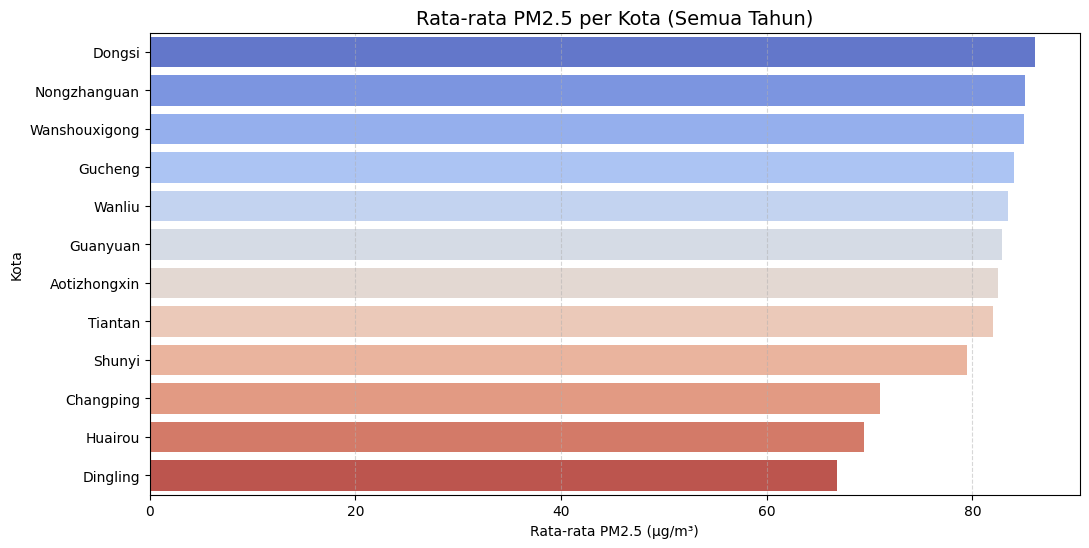

In [53]:
avg_pm25 = all_df.groupby('station')['PM2.5'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_pm25.values, y=avg_pm25.index, palette='coolwarm')
plt.title('Rata-rata PM2.5 per Kota (Semua Tahun)', fontsize=14)
plt.xlabel('Rata-rata PM2.5 (µg/m³)')
plt.ylabel('Kota')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

### Pertanyaan 2:

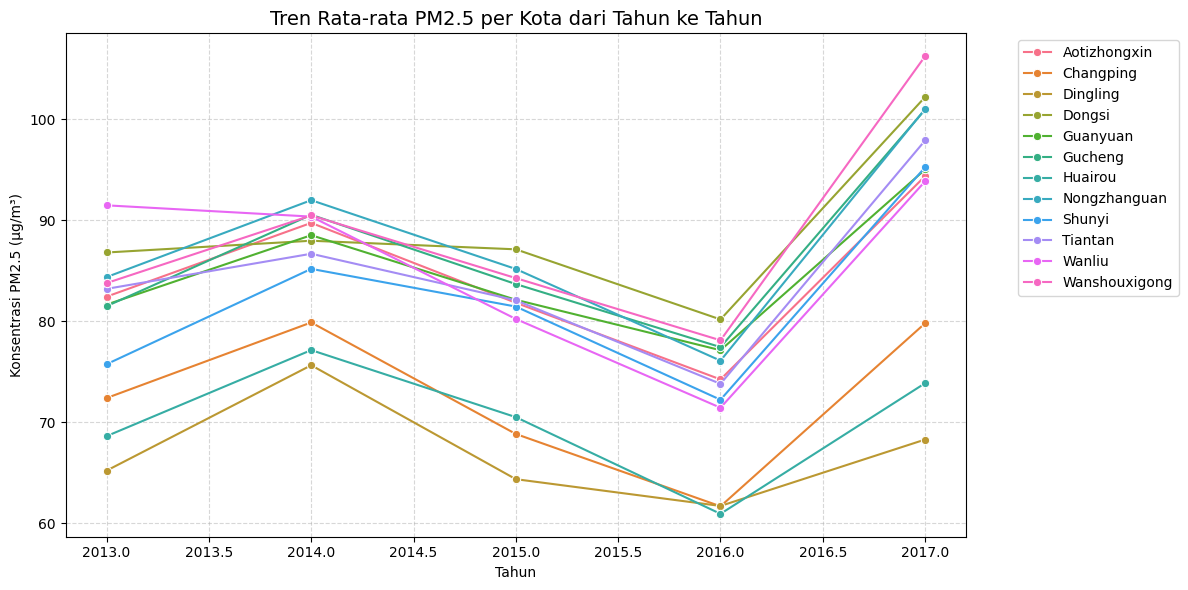

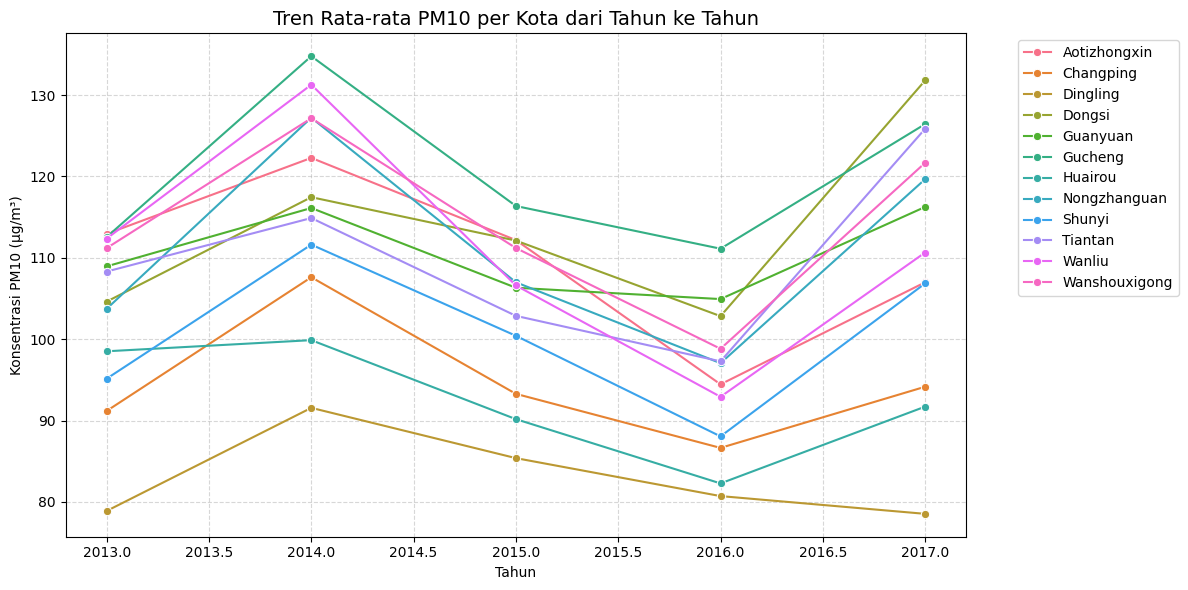

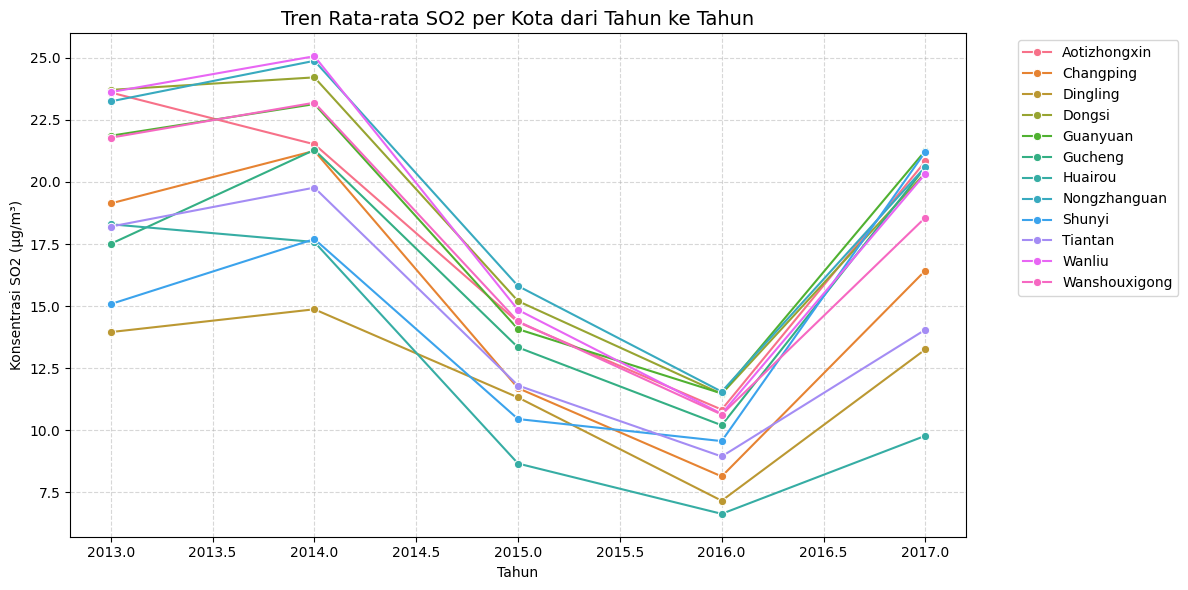

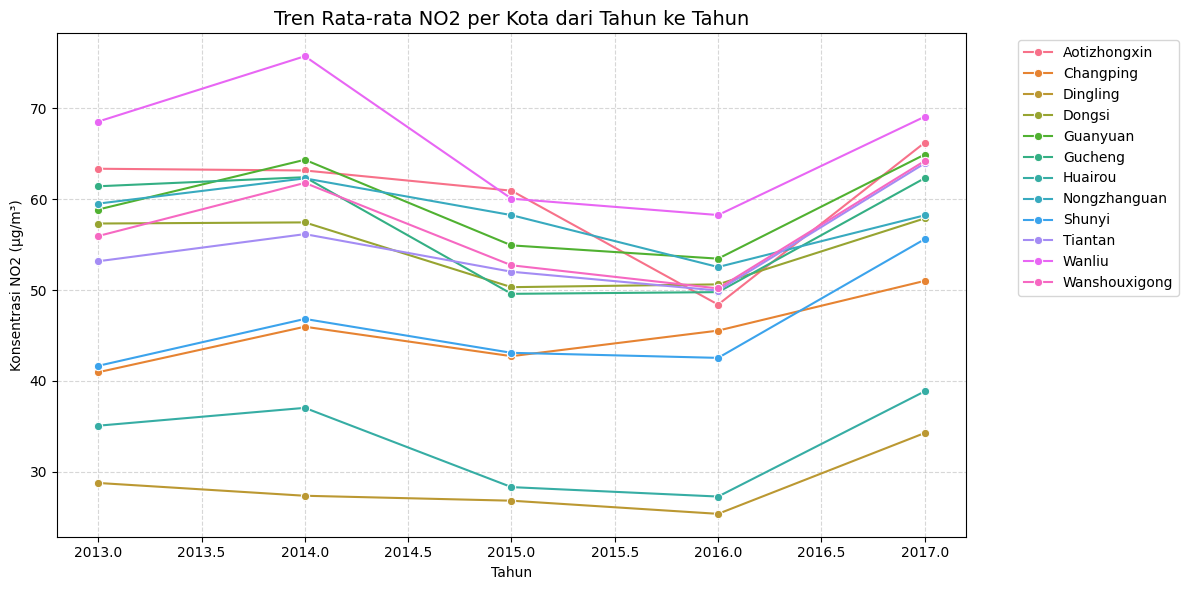

In [54]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2']
city_year_pollutant = all_df.groupby(['year', 'station'])[pollutants].mean().reset_index()

# Plot lineplot per polutan
for pol in pollutants:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=city_year_pollutant, x='year', y=pol, hue='station', marker='o')
    plt.title(f'Tren Rata-rata {pol} per Kota dari Tahun ke Tahun', fontsize=14)
    plt.ylabel(f'Konsentrasi {pol} (µg/m³)')
    plt.xlabel('Tahun')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

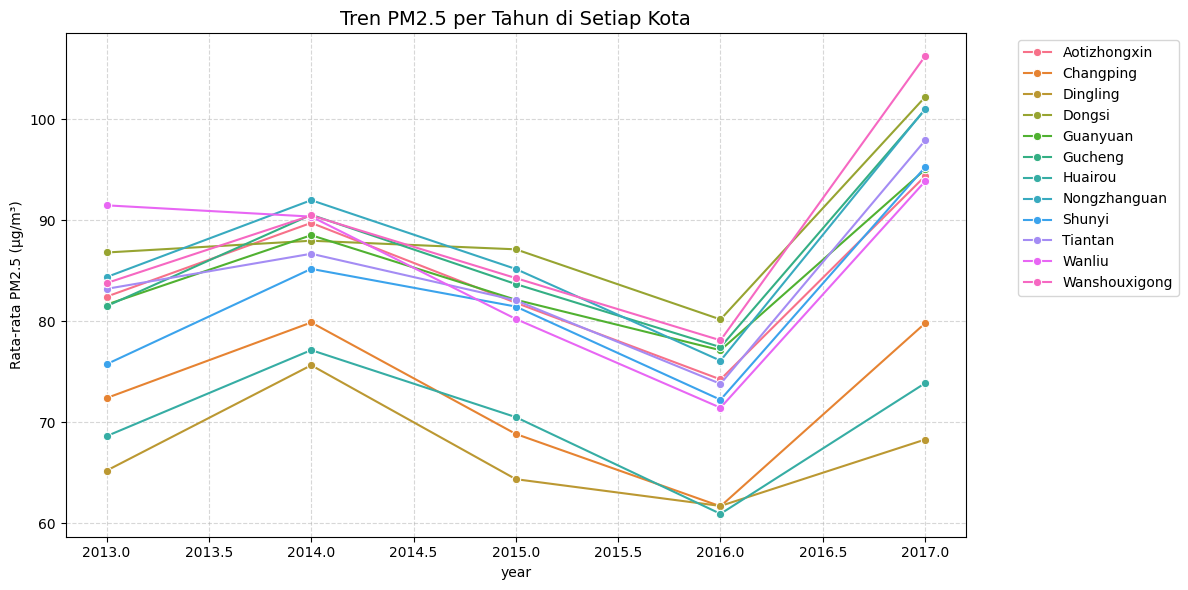

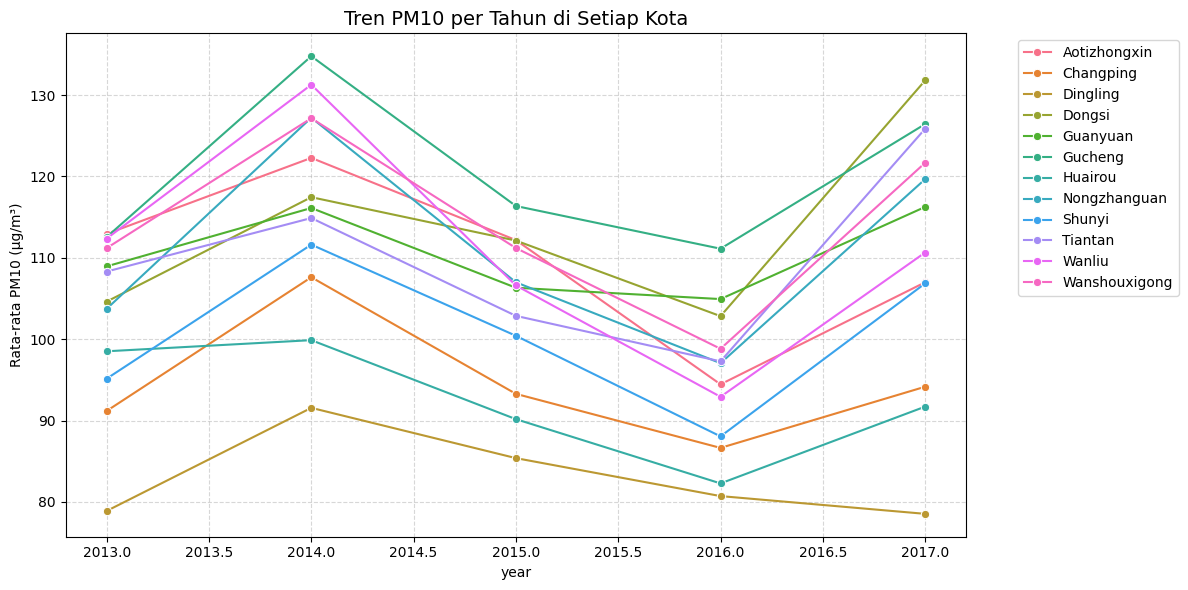

In [55]:
pm_trend = all_df.groupby(['year', 'station'])[['PM2.5', 'PM10']].mean().reset_index()

# Visualisasi PM2.5
plt.figure(figsize=(12, 6))
sns.lineplot(data=pm_trend, x='year', y='PM2.5', hue='station', marker='o')
plt.title('Tren PM2.5 per Tahun di Setiap Kota', fontsize=14)
plt.ylabel('Rata-rata PM2.5 (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualisasi PM10
plt.figure(figsize=(12, 6))
sns.lineplot(data=pm_trend, x='year', y='PM10', hue='station', marker='o')
plt.title('Tren PM10 per Tahun di Setiap Kota', fontsize=14)
plt.ylabel('Rata-rata PM10 (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


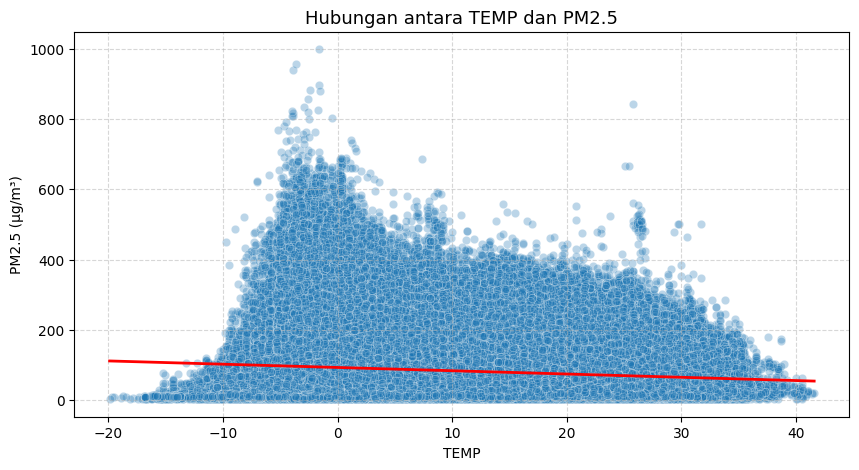

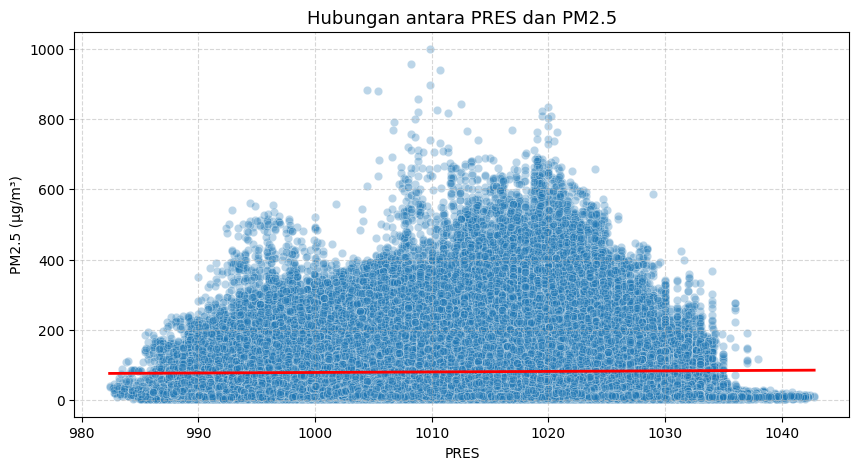

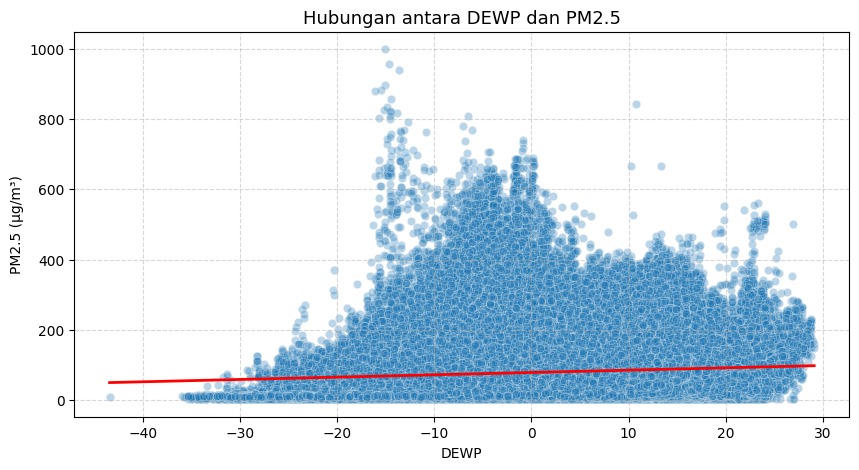

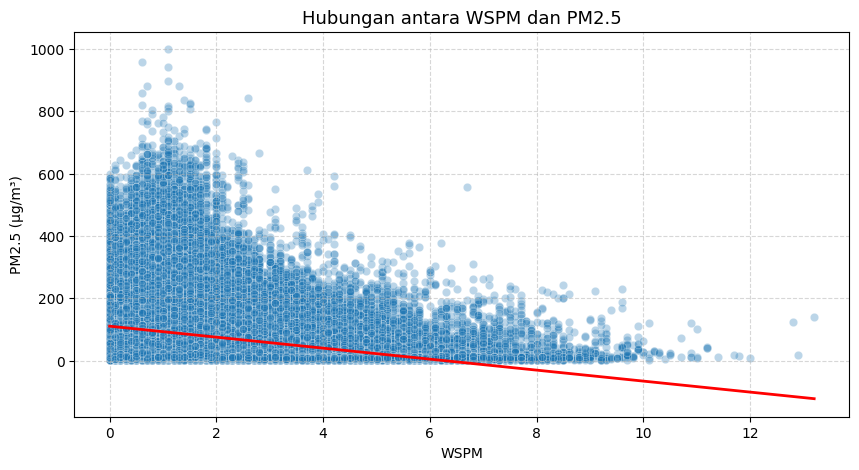

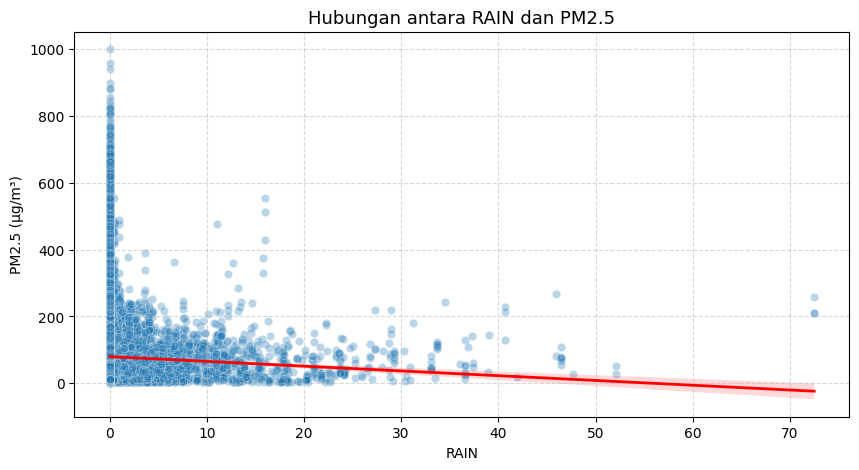

In [56]:
weather_vars = ['TEMP', 'PRES', 'DEWP', 'WSPM', 'RAIN']
for var in weather_vars:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=all_df, x=var, y='PM2.5', alpha=0.3)
    sns.regplot(data=all_df, x=var, y='PM2.5', scatter=False, color='red', line_kws={"linewidth":2})
    plt.title(f'Hubungan antara {var} dan PM2.5', fontsize=13)
    plt.xlabel(var)
    plt.ylabel('PM2.5 (µg/m³)')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


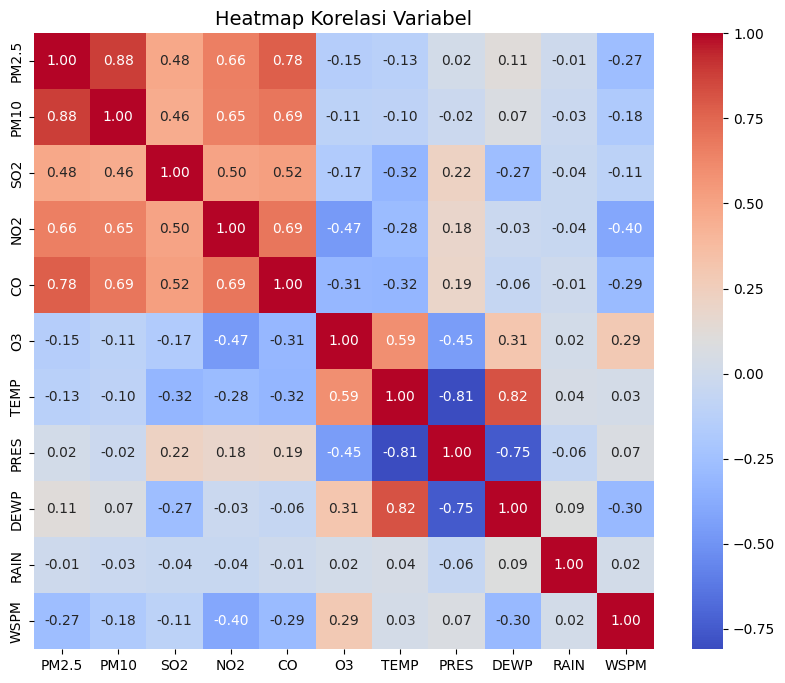

In [57]:
#visualize heatmap correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Variabel', fontsize=14)
plt.show()

**Insight:**
- Kota dengan polusi tertinggi PM2.5: Dongsi (86.14), Nongzhanguan	(85.08),Wanshouxigong	(85.07)
- Kota dengan udara terbaik :Dingling	66.85, Huairou	69.50, Changping	70.99
- Tren polusi di semua kota mengalami penurunan dari tahun 2013 - 2016 namun kembali naik pada tahun 2017
- Pada rentang angin paling lemah (-0.0132, 1.32), rata-rata PM2.5 sangat tinggi: 99.23 µg/m³. saat udara tidak bergerak polusi cenderung menumpuk
- Terdapat anomali pada rentang angin interval tinggi (11.88, 13.2)72.50, kemungkinan angin kencang membawa polusi dari wilayah lain

## Analisis Lanjutan (Opsional)

## Conclusion

1. Kota dengan Polusi tertinggi adalah kota dongsi dengan rata - rata PM2.5 86.14 dan Kota dengan polusi terendah adalah kota Dingling dengan rata-rata PM2.5 66.85
2. Tren polusi di semua kota mengalami penurunan dari tahun 2013 - 2016 namun kembali naik pada tahun 2017
3.Berikut merupakan pengaruh kondisi cuaca terhadap tingkat polusi tiap kota:
  - Suhu berkorelasi negatif dengan PM2.5 (-0.13), PM10 (-0.10), SO2 (-0.32), NO2 (-0.28), dan CO (-0.32)Saat suhu meningkat, konsentrasi polutan seperti PM2.5, PM10, SO2, NO2, dan CO cenderung menurun. Ini bisa terjadi karena udara hangat membuat partikel polusi lebih mudah menyebar atau terdilusi
  - Tekanan Udara berkorelasi lemah atau sedang: positif terhadap PM2.5 (0.02), PM10 (-0.02), SO2 (0.22), NO2 (0.18), CO (0.19)
  - Curah hujan Berkorelasi sangat lemah terhadap hampir semua polutan (sekitar -0.04 hingga 0.02). Meskipun secara teori hujan mengurangi polutan karena efek pencucian udara, dalam data ini pengaruhnya sangat kecil, karena:Curah hujan rendah dan Frekuensi hujan tidak cukup signifikan dalam data
  - Korelasi negatif signifikan dengan PM2.5 (-0.27), PM10 (-0.18), NO2 (-0.40), CO (-0.29) Angin membantu menyebarkan dan mengencerkan polutan, sehingga semakin tinggi kecepatan angin → semakin rendah konsentrasi polutan.